In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import avo_func as avo
%matplotlib inline

## First, I'll reproduce the Figures 2 and 3 from Smith and Giglow (1987). I'll use the approximations from Aki and Richard (1980) and Shuey (1985).

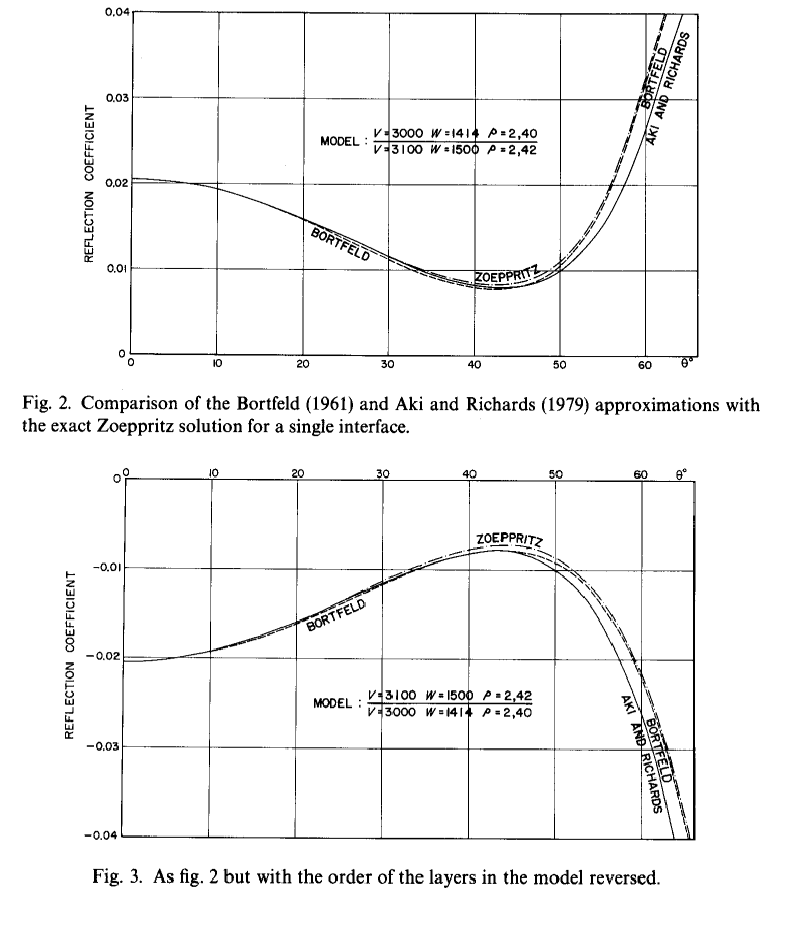

In [2]:
Image(filename='fig2_3_smith_gidlow_1987.png', width=500)

In [3]:
#define the properties
vp1,vs1,rho1 = 3100,1500,2.42 #shale
vp2,vs2,rho2 = 3000,1414,2.4 #gas
angle = np.arange(0,66,1)

#approximations at the top
I,G,shuey2,shuey3 = avo.shuey(vp1,vs1,rho1,vp2,vs2,rho2,angle)
aki = avo.akirichards(vp1,vs1,rho1,vp2,vs2,rho2,angle)

#approximations at the base
Ib,Gb,shuey2b,shuey3b = avo.shuey(vp2,vs2,rho2,vp1,vs1,rho1,angle)
akib = avo.akirichards(vp2,vs2,rho2,vp1,vs1,rho1,angle)

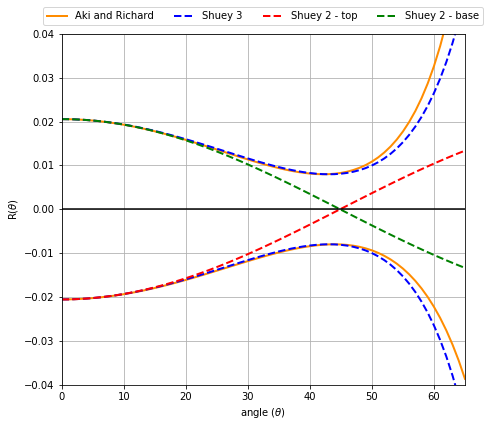

In [4]:
mxplot=0.04

fig=plt.figure(figsize=(7,6))
ax=plt.subplot(1,1,1)

plt.plot(angle,aki,'-',color='darkorange',label='Aki and Richard',linewidth=2)
plt.plot(angle,shuey3,'--',color='blue',label='Shuey 3',linewidth=2)
plt.plot(angle,shuey2,'--',color='red',label='Shuey 2 - top',linewidth=2)

plt.plot(angle,akib,'-',color='darkorange',linewidth=2)
plt.plot(angle,shuey3b,'--',color='blue',linewidth=2)
plt.plot(angle,shuey2b,'--',color='green',label='Shuey 2 - base',linewidth=2)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09),ncol=4)
plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)')
ax.set_ylabel('R($\\theta$)')
yt=np.linspace(-mxplot,mxplot,9)
plt.yticks(yt)
plt.xlim(0.,65)
plt.ylim(-mxplot,mxplot)
plt.grid()
plt.tight_layout()

## Now I'll make the same for the Figure 3 in chaper 4 of Chopra and Castagna (2014). In addition, I'll compute the intercept x gradient, compute the NI offset gather and the angle gather.

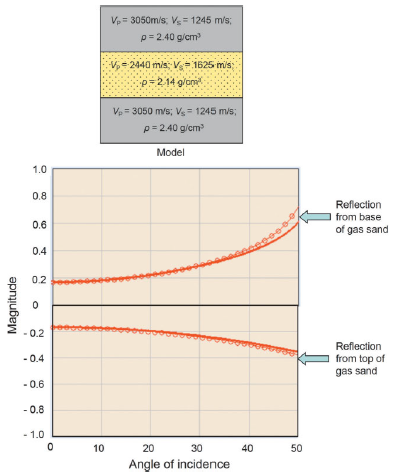

In [5]:
Image(filename='Fig3_Cap4_Pag62_Chopra_Castagna.png', width=500)

In [6]:
#define the properties
vp1,vs1,rho1 = 3050,1245,2.4 #shale
vp2,vs2,rho2 = 2440,1625,2.14 #gas
angle = np.arange(0,51,1)

#approximations at the top
I,G,shuey2,shuey3 = avo.shuey(vp1,vs1,rho1,vp2,vs2,rho2,angle)
aki = avo.akirichards(vp1,vs1,rho1,vp2,vs2,rho2,angle)

#approximations at the base
Ib,Gb,shuey2b,shuey3b = avo.shuey(vp2,vs2,rho2,vp1,vs1,rho1,angle)
akib = avo.akirichards(vp2,vs2,rho2,vp1,vs1,rho1,angle)

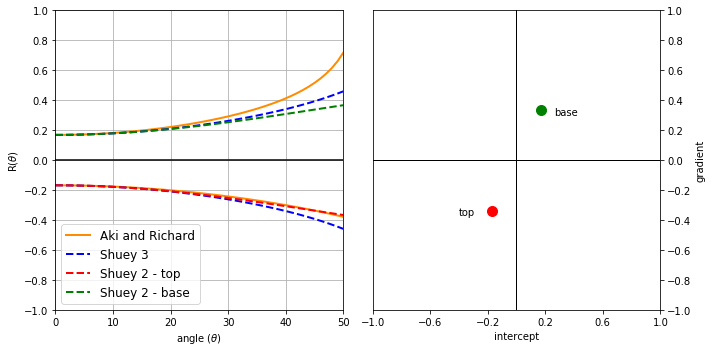

In [7]:
mxplot=1

fig=plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)

plt.plot(angle,aki,'-',color='darkorange',label='Aki and Richard',linewidth=2)
plt.plot(angle,shuey3,'--',color='blue',label='Shuey 3',linewidth=2)
plt.plot(angle,shuey2,'--',color='red',label='Shuey 2 - top',linewidth=2)

plt.plot(angle,akib,'-',color='darkorange',linewidth=2)
plt.plot(angle,shuey3b,'--',color='blue',linewidth=2)
plt.plot(angle,shuey2b,'--',color='green',label='Shuey 2 - base',linewidth=2)

plt.legend(loc='lower left',fontsize='large')

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)')
ax.set_ylabel('R($\\theta$)')
yt=np.linspace(-mxplot,mxplot,11)
plt.yticks(yt)
plt.xlim(0.,50)
plt.ylim(-mxplot,mxplot)
plt.grid()

ax2=plt.subplot(1,2,2)
ax2.plot(I,G,'ro',markersize=10)
ax2.plot(Ib,Gb,'go',markersize=10)
ax2.axhline(0, color='k', lw=1), ax2.axvline(0, color='k', lw=1)
ax2.set_xlabel('intercept'), ax2.set_ylabel('gradient')
ax2.set_xlim(-mxplot,mxplot), ax2.set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,11)
xt=np.linspace(-mxplot,mxplot,6)
ax2.set_yticks(yt)
ax2.set_xticks(xt)
ax2.xaxis.set_label_position('bottom'), ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right'), ax2.yaxis.tick_right()
plt.text(-0.4,-0.37,'top')
plt.text(0.26,0.3,'base')

plt.tight_layout()

#### Now I'll compute and plot the reflectivity, wavelet, normal incidence offset gather and angle gather. 

In [8]:
#define the new range of angles
angle = np.arange(0,31,1)

# the properties now will generate a log
vp1 = np.zeros(170) + vp1 #m/s
vs1 = np.zeros(170) + vs1
rho1 = np.zeros(170) + rho1 #g/cc
vs2 = np.zeros(170) + vs2
vp2 = np.zeros(170) + vp2 #m/s
rho2 = np.zeros(170) + rho2 #g/cc

vp=np.concatenate((vp1,vp2,vp1))
vs=np.concatenate((vs1,vs2,vs1))
rho=np.concatenate((rho1,rho2,rho1))

ip=vp*rho #impedance
rc=avo.reflect_coef(ip) #reflection coefficient - normal incidence
#define the ricker wavelet
freq=25
length = 0.255
dt = 0.001
time,wavelet=avo.rickerwave(freq, length, dt)
#normal incidence offset gather
NI=np.convolve(wavelet,rc,mode='same')
#reflectivity on a interface
reflect,r0,g=avo.shueyrc(vp,vs,rho,angle)
#generate the angle gather
anglegather=[]
for i in range(len(angle)):
    anglegather.append(np.convolve(wavelet,reflect[:,i],mode='same'))
anglegather=np.asarray(anglegather).T

time2=np.arange(0,(len(ip))*dt,dt)

#### Plot of reflection coefficient, wavelet and normal incidence offset gather.

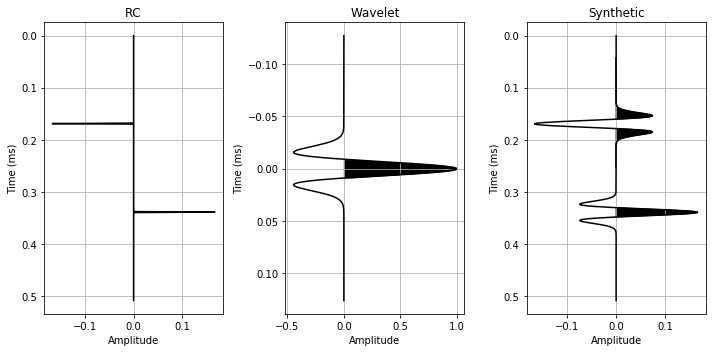

In [9]:
fig=plt.figure(figsize=(10,5))

ax = plt.subplot(1,3,1)
plt.title('RC')
plt.plot(rc,time2,'k')
ax.invert_yaxis()
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Amplitude')
plt.grid(True)

ax = plt.subplot(1,3,2)
plt.title('Wavelet')
plt.plot(wavelet,time,'k')
plt.fill_betweenx(time, wavelet, 0, wavelet > 0, color='k', alpha=1.0)
ax.invert_yaxis()
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Amplitude')
plt.grid(True)

ax = plt.subplot(1,3,3)
plt.title('Synthetic')
plt.plot(NI,time2,'k')
plt.fill_betweenx(time2, NI, 0, NI > 0, color='k', alpha=1.0)
ax.invert_yaxis()
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Amplitude')
plt.grid(True)

plt.tight_layout()

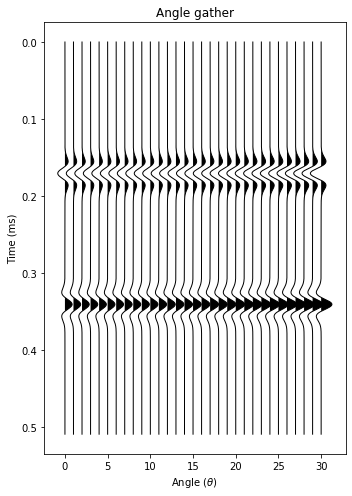

In [10]:
scale_factor=5. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
fig=plt.figure(figsize=(5,7))
ax = plt.subplot(1,1,1)
plt.title('Angle gather')
for i in range(len(angle)):
       ax.plot(i+anglegatherplt[:,i],time2,'k',linewidth=1)
       ax.fill_betweenx(time2,anglegatherplt[:,i]+i,i,
                        where=anglegatherplt[:,i]+i>i,facecolor='black')
ax.invert_yaxis()
ax.set_xlabel('Angle ($\\theta$)')
ax.set_ylabel('Time (ms)')
plt.tight_layout()

### References:

Aki, K. I., and Richards, P. G., 1980, Quantitative seismology: W. H. Freeman and Co.

Chopra, S., & Castagna, J. P., 2014. Avo. Society of Exploration Geophysicists.

Shuey,R.T., 1985,Asimplification of Zoeppritz equations: Geophysics, 50, 609–614.
 
Smith, G. C. and Gidlow, P. M., 1987. Weighted stacking for rock property estimation and detection of gas: Geophys. Prosp., 35, 993–1014.
 
https://github.com/aadm/geophysical_notes

https://github.com/aadm/avo_explorer

https://github.com/agile-geoscience/bruges

https://github.com/sconten/rppy 